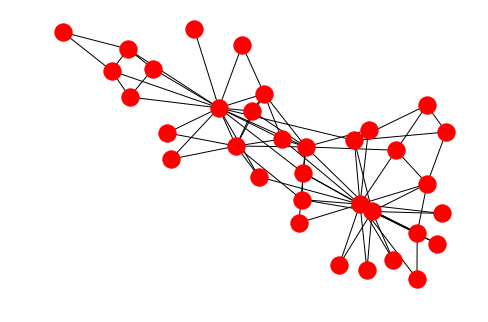

<Figure size 432x288 with 0 Axes>

In [178]:
#problem b
import numpy
import urllib
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict


### Network visualization ###
import networkx as nx
import matplotlib.pyplot as plt

# Karate club
G = nx.karate_club_graph()
nx.draw(G)
plt.show()
plt.clf()


import urllib.request
url="http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt"
data=urllib.request.urlopen(url).read()
list1 = data.decode('ascii').split('\n')
list1.remove('')

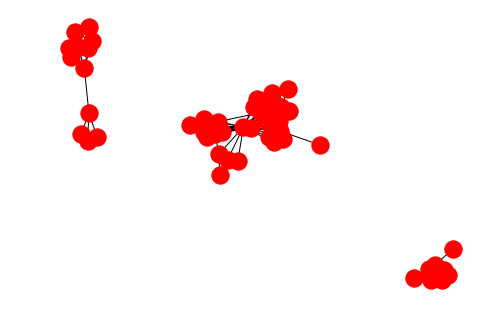

number of components is  3


<Figure size 432x288 with 0 Axes>

In [179]:
#question 5
edges = set()
nodes = set()
for edge in list1:
    x,y = edge.split(' ')
    x,y = int(x),int(y)
    edges.add((x,y))
    edges.add((y,x))
    nodes.add(x)
    nodes.add(y)
G = nx.Graph()
for e in edges:
    G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()
num_components = nx.number_connected_components(G)
print('number of components is ',num_components)

In [180]:
max_components =max(nx.connected_components(G),key =len)
print('the number of nodes in the largest components  is ',len(max_components))

the number of nodes in the largest components  is  40


In [181]:
#question 6
max_components_subgraphs =max(nx.connected_component_subgraphs(G),key =len)
G_list = list(max_components_subgraphs.node())
new_list = sorted(G_list)


In [182]:
low_list = new_list[:int(len(new_list)/2)]
high_list = new_list[int(len(new_list)/2):]
N_cut = (nx.cut_size(max_components_subgraphs, low_list, high_list)/sum([max_components_subgraphs.degree(v) for v in low_list])+nx.cut_size(max_components_subgraphs, low_list, high_list)/sum([max_components_subgraphs.degree(v) for v in high_list]))/2
print(N_cut)

0.42240587695133147


In [183]:
#question 7
def N_cut(a,b):
    N = (nx.cut_size(max_components_subgraphs, a, b)/sum([max_components_subgraphs.degree(v) for v in a])+nx.cut_size(max_components_subgraphs, a, b)/sum([max_components_subgraphs.degree(v) for v in b]))/2
    return N


In [185]:
list1 = low_list
list2 = high_list
list3 = []
list_seq1 =[]
list_seq2 =[]
N_cut_list = []
N_cut_list_set1 = []
N_cut_list_set2 =[]
j = 2
while j  > 1 :   
    for i in range(len(list2)):
        list1.append(list2[i])
        list_seq1.append(list2[i])
        list2.remove(list2[i])
        N_cut_list_set1.append(N_cut(list1,list2))
        list2.append(list1[len(list1)-1])
        list1.remove(list1[len(list1)-1])
    for i in range(len(list1)):
        list2.append(list1[i])
        list_seq2.append(list1[i])
        list1.remove(list1[i])
        N_cut_list_set2.append(N_cut(list1,list2))
        list1.append(list2[len(list2)-1])
        list2.remove(list2[len(list2)-1])
        
    if list1 != []:
        compare_value = N_cut(list1,list2)
    else:
        compare_value = 1
    
    min_value_1 = min(N_cut_list_set1)
    min_value_2 = min(N_cut_list_set2)
    if min_value_1 > min_value_2 :
        min_value = min_value_2
        if min_value < compare_value: 
            a = N_cut_list_set2.index(min(N_cut_list_set2))
            list2.append(list_seq2[a])
            list1.remove(list_seq2[a])
            N_cut_list_set1 =[]
            N_cut_list_set2 =[]
            list_seq1 =[]
            list_seq2 =[
        else:
            j = 0
    else:
        min_value = min_value_1
        if min_value < compare_value: 
            a = N_cut_list_set1.index(min(N_cut_list_set1))
            list1.append(list_seq1[a])
            list2.remove(list_seq1[a])
            N_cut_list_set1 =[]
            N_cut_list_set2 =[]
            list_seq1 =[]
            list_seq2 =[]
        else:
            j =0
        

SyntaxError: invalid syntax (<ipython-input-185-aa1e4006b165>, line 43)

In [176]:
value = N_cut(list1,list2)

[825, 861, 888, 893, 886, 889, 882, 884, 878, 864, 876, 863]

In [136]:
list1 = []
list2 = new_list
list3 = []
list_seq =[]
N_cut_list = []
j = 2
compare_value = 0
while j  > 1 :   
    for i in range(len(list2)):
        list1.append(list2[i])
        list_seq.append(list2[i])
        list2.remove(list2[i])
        N_cut_list.append(N_cut(list1,list2))
        list2.append(list1[len(list1)-1])
        list1.remove(list1[len(list1)-1])
    min_value = min(N_cut_list)
    if list1 != []:
        compare_value = N_cut(list1,list2)
    else:
        compare_value = 1
    if min_value < compare_value: 
        a = N_cut_list.index(min(N_cut_list)) 
        list1.append(list_seq[a])
        list2.remove(list_seq[a])
        N_cut_list =[]
        list_seq =[]
        print(list1)
    else:
        j =0
        

[798]
[798, 769]
[798, 769, 890]
[798, 769, 890, 869]
